# KCNH5 and developmental and epileptic encephalopathy-112 (DEE112)


[DEE112](https://omim.org/entry/620537) is caused by heterozygous mutation in the [KCNH5](https://omim.org/entry/605716) gene.

KCNH5 encodes the voltage-gated potassium channel EAG2/Kv10.2. developmental and epileptic
encephalopathy 112 (DEE112) an autosomal dominant disorder characterized by a wide range of seizure types, including focal and generalized seizures. Cognitive outcomes range from normal intellect to profound impairment ([Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/)).

For this analysis, we have collected data from the following publications.

- [Veeramah KR,  et al., 2013](https://pubmed.ncbi.nlm.nih.gov/23647072/) Exome sequencing reveals new causal mutations in children with epileptic encephalopathies. 
- [Minardi R, et al., 2020](https://pubmed.ncbi.nlm.nih.gov/32725632/) Whole-exome sequencing in adult patients with developmental and epileptic encephalopathy: It is never too late. 
- [Hu X, et al., 2022](https://pubmed.ncbi.nlm.nih.gov/35874597/),Clinical Feature, Treatment, and KCNH5 Mutations in Epilepsy.
- [Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/), Neurodevelopmental and Epilepsy Phenotypes in Individuals With Missense Variants in the Voltage-Sensing and Pore Domains of KCNH5.
- [Huang S, et al., 2024 ](https://pubmed.ncbi.nlm.nih.gov/38708366/) Clinical phenotypes of developmental and epileptic encephalopathy-related recurrent KCNH5 missense variant p.R327H in Chinese children. 

- [Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/) reported that
>  Individuals with the recurrent p.Arg333His variant had a self-limited drug-responsive focal or generalized epilepsy and normal intellect, whereas the recurrent p.Arg327His variant was associated with infantile-onset DEE. 
- [Huang S, et al., 2024 ](https://pubmed.ncbi.nlm.nih.gov/38708366/) described potential correlations for R327H
> The authors investigate the first Chinese cohort of KCNH5 p.R327H-associated DEE and the incomplete penetrance of this KCNH5 variant. Add-on VPA therapy could be effective in such patients, especially in their early stages.

None of the above publications applied formal statistical testing to the data.

> Example: Therefore, we tested missense vs other variants (inspection of the distribution of variants showed that the other variant categories in our dataset are [list other variant categories], all of which we deemed to be null variants for the purposes of this analysis). We also tested the two most common missense variants ([DETAILS]) for correlations.

In [1]:
import gpsea
import hpotk
from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.3.1.dev0


In [2]:
from pyphetools.visualization import PhenopacketIngestor
kcnh5_dir = "/Users/robin/GIT/phenopacket-store/notebooks/KCNH5/phenopackets"
import os 
if not os.path.isdir(kcnh5_dir):
     raise FileNotFoundError(f"Could not find {kcnh5_dir}.")                
ingestor = PhenopacketIngestor(indir=kcnh5_dir)
phenopackets = ingestor.get_phenopacket_list()
cohort_name = "KCNH5"

print(f"Imported {len(phenopackets)} phenopackets from cohort {cohort_name}")

[pyphetools] Ingested 22 GA4GH phenopackets.
Imported 22 phenopackets from cohort KCNH5


In [3]:
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(phenopackets=phenopackets,cohort_creator=cohort_creator,)

Patients Created: 100%|██████████| 22/22 [00:10<00:00,  2.19it/s]


In [4]:
validation.summarize()  

Validated under none policy
No errors or warnings were found


In [5]:
KCNH5_MANE_transcript = 'NM_139318.5'
KCNH5_protein_id = 'NP_647479.2' # potassium voltage-gated channel subfamily H member 5 isoform 1
from gpsea.view import CohortViewable
cv = CohortViewable(hpo=hpo)
report = cv.process(cohort=cohort, transcript_id=KCNH5_MANE_transcript)
display(HTML(report))

HPO Term,ID,Seen in n individuals
Epileptic encephalopathy,HP:0200134,14
Bilateral tonic-clonic seizure,HP:0002069,13
Delayed speech and language development,HP:0000750,11
Intellectual disability,HP:0001249,10
Bilateral tonic-clonic seizure with focal onset,HP:0007334,6
Global developmental delay,HP:0001263,6
Focal motor seizure,HP:0011153,5
Myoclonic seizure,HP:0032794,4
Hypotonia,HP:0001252,4
Focal impaired awareness motor seizure,HP:0032712,4


In [6]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_protein_metadata_service()
tx_coordinates = txc_service.fetch(KCNH5_MANE_transcript)
protein_meta = pms.annotate(KCNH5_protein_id)

/var/folders/hq/zttr8hjx127fgvh0bq7h4bc80000gn/T/ipykernel_58641/4250484411.py:4: DeprecationWarning: Use `configure_default_protein_metadata_service` instead
  pms = configure_protein_metadata_service()


https://rest.uniprot.org/uniprotkb/search?query=(NP_647479.2)AND(reviewed:true)&fields=accession,id,gene_names,gene_primary,protein_name,ft_domain,ft_motif,ft_region,ft_repeat,xref_refseq,length


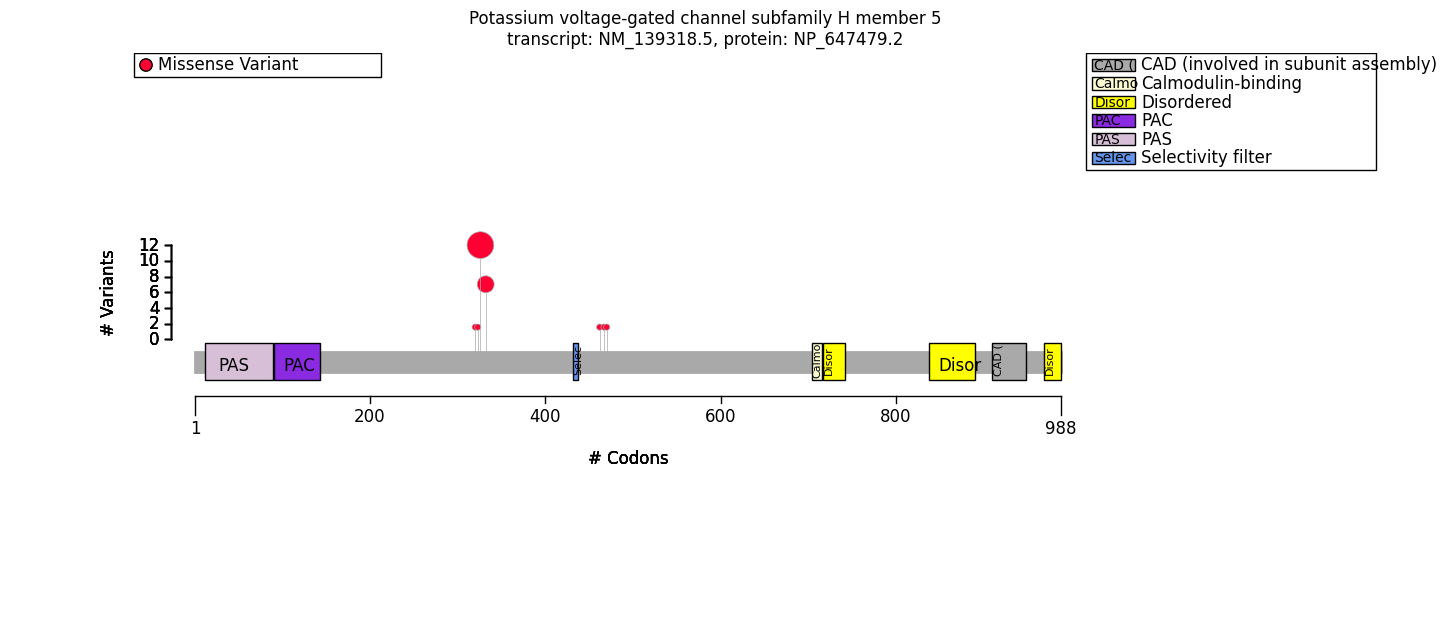

In [7]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()
#fig.savefig('docs/img/tutorial/KCNH5_protein_diagram.png')  #

In [8]:
from gpsea.analysis.predicate.genotype import ModeOfInheritancePredicate, VariantPredicates
vp = VariantPredicates.variant_key("14_62950522_62950522_C_T")  # c.980G>A; p.Arg327His

gt_predicate = ModeOfInheritancePredicate.autosomal_dominant(
    variant_predicate=vp,
)

In [9]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
    min_n_of_patients_with_term=2,
)
from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter(hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05
from gpsea.analysis.pcats.stats import FisherExactTest
count_statistic = FisherExactTest()

In [10]:
from gpsea.analysis.pcats import HpoTermAnalysis
analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=mtc_alpha,
)
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

In [11]:
from gpsea.view import MtcStatsViewer
mtc_viewer = MtcStatsViewer()
mtc_report = mtc_viewer.process(result)
display(HTML(mtc_report))

Code,Reason,Count
TODO,Skipping term because all genotypes have same HPO observed proportions,13
TODO,Skipping general term,9
TODO,Skipping term with only 4 observations (not powered for 2x2),8
TODO,Skipping term with only 2 observations (not powered for 2x2),7
TODO,Skipping term with maximum frequency that was less than threshold 0.2,5
TODO,Skipping term with only 3 observations (not powered for 2x2),3
TODO,Skipping term with only 5 observations (not powered for 2x2),1


In [12]:
from gpsea.analysis.predicate import PatientCategories
summary_df = result.summarize(hpo, PatientCategories.YES)
summary_df.head(45)

Which genotype group does the patient fit in       HOM_REF            HET  \
                                                     Count Percent  Count   
Intellectual disability [HP:0001249]                   2/5     40%    8/8   
Epileptic encephalopathy [HP:0200134]                  4/7     57%  10/10   
Status epilepticus [HP:0002133]                       3/10     30%   0/12   
Focal tonic seizure [HP:0011167]                       2/8     25%    0/9   
Developmental regression [HP:0002376]                  0/8      0%   3/11   
Delayed speech and language development [HP:000...     2/3     67%    9/9   
Hypotonia [HP:0001252]                                 3/9     33%   1/11   
Myoclonic seizure [HP:0032794]                        3/10     30%   1/12   
Cerebral atrophy [HP:0002059]                          2/8     25%    0/7   
Focal impaired awareness motor seizure [HP:0032...     3/8     38%    1/8   
Bilateral tonic-clonic seizure with focal onset...    3/10     30%   3/11   
Global developmental delay [HP:0001263]                5/6     83%    1/1   
Bilateral tonic-clonic seizure [HP:0002069]            8/8    100%  11/11   
Seizure [HP:0001250]                                 10/10    100%  12/12   
Abnormal nervous system physiology [HP:0012638]      10/10    100%  12/12   
Abnormality of the nervous system [HP:0000707]       10/10    100%  12/12   
Phenotypic abnormality [HP:0000118]                  10/10    100%  12/12   
All [HP:0000001]                                     10/10    100%  12/12   
Neurodevelopmental delay [HP:0012758]                  6/6    100%  10/10   
Neurodevelopmental abnormality [HP:0012759]            6/6    100%  11/11   
Language impairment [HP:0002463]                       2/2    100%    9/9   
Abnormal communication [HP:0034434]                    2/2    100%    9/9   
Abnormal cognitive process [HP:0025792]                2/2    100%    9/9   
Abnormality of mental function [HP:0011446]            4/4    100%  11/11   
Abnormal speech pattern [HP:0002167]                   2/2    100%    9/9   
Abnormal language feature [HP:4000072]                 2/2    100%    9/9   
Motor seizure [HP:0020219]                             9/9    100%    7/7   
Abnormal muscle tone [HP:0003808]                      3/3    100%    1/1   
Abnormal muscle physiology [HP:0011804]                3/3    100%    1/1   
Abnormality of the musculature [HP:0003011]            3/3    100%    2/2   
Abnormality of the musculoskeletal system [HP:0...     3/3    100%    2/2   
Focal motor seizure [HP:0011153]                       6/6    100%    7/7   
Focal-onset seizure [HP:0007359]                       7/7    100%    8/8   
Focal impaired awareness seizure [HP:0002384]          3/3    100%    1/1   
Dialeptic seizure [HP:0011146]                         3/3    100%    1/1   
Encephalopathy [HP:0001298]                            4/4    100%  10/10   
Hyperintensity of cerebral white matter on MRI ...     0/2      0%    1/2   
Abnormal cerebral morphology [HP:0002060]              2/2    100%    1/1   
Abnormal forebrain morphology [HP:0100547]             2/2    100%    1/1   
Abnormal brain morphology [HP:0012443]                 3/3    100%    1/1   
Morphological central nervous system abnormalit...     3/3    100%    1/1   
Abnormal nervous system morphology [HP:0012639]        3/3    100%    1/1   
Clonic seizure [HP:0020221]                            2/2    100%    2/2   
Generalized non-motor (absence) seizure [HP:000...    0/10      0%   1/12   
Motor delay [HP:0001270]                               1/2     50%    1/2   

Which genotype group does the patient fit in                                   \
                                                   Percent Corrected p values   
Intellectual disability [HP:0001249]                  100%           0.308824   
Epileptic encephalopathy [HP:0200134]                 100%           0.308824   
Status epilepticus [HP:0002133]                         